## 1. Importing Reuters dataset

Loading the Reuters datase

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

 Decoding newswires back to text

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
                             train_data[0]])

## 2. Preparing the data

Vectorizing the data

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Categorical Encoding of the labels

In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3. Building the network

Model definition

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compiling the model

In [6]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Seperating validation data

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## 4. Training the model

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 26ms/step - loss: 2.5796 - accuracy: 0.5332 - val_loss: 1.6991 - val_accuracy: 0.6370
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.3992 - accuracy: 0.7001 - val_loss: 1.3046 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 0s 26ms/step - loss: 1.0499 - accuracy: 0.7775 - val_loss: 1.1477 - val_accuracy: 0.7470
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8315 - accuracy: 0.8232 - val_loss: 1.0532 - val_accuracy: 0.7880
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6661 - accuracy: 0.8554 - val_loss: 1.0009 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 0s 20ms/step - loss: 0.5341 - accuracy: 0.8862 - val_loss: 0.9642 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 0s 23ms/step - loss: 0.4314 - accuracy: 0.9089 - val_loss: 0.9112 - val_accuracy: 0.8240
Epoch 8/9
16/16 [===

## 5. Plotting the results

Training and validation loss

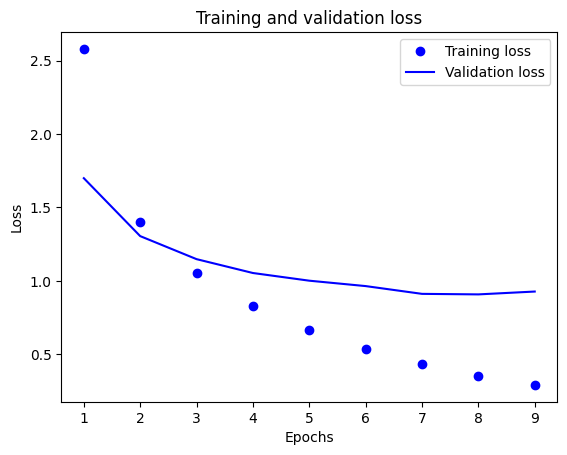

In [9]:
import matplotlib.pyplot as plt
import numpy 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Training and validation accuracy

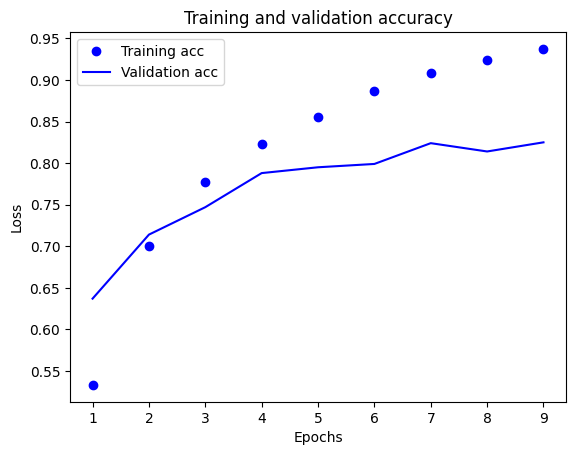

In [10]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Results

In [11]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0257 - accuracy: 0.7774


The accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 80%,

## 6.  Generating predictions on new data    

In [12]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


Each entry in predictions is a vector of length 46:

In [13]:
 predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

In [14]:
 np.sum(predictions[0])

1.0

The largest entry is the predicted class—the class with the highest probability:

In [15]:
 np.argmax(predictions[0])

4

Reversing the value to get the word

In [16]:
def get_key(val):
    for key, value in word_index.items():
        if val == 3:
            return key
 
    return "key doesn't exist"
get_key(3)

'mdbl'